In [ ]:
## Callin Switzer
## Capture Images from pt grey camera

In [1]:
# setup arduino
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

import datetime

import PyCapture2 as fc2
import sys

import time

import os
import peakutils 
import msvcrt
import winsound
import shutil
import pandas as pd

import skimage.io as io

In [2]:
vidPath = 'C:\\Users\\Combes4\\Desktop\\twoCamSave\\SaveImageToAviEx-0000.avi'
vidPath2 = 'C:\\Users\\Combes4\\Desktop\\twoCamSave\\SaveImageToAviEx2-0000.avi'

cap = cv2.VideoCapture(vidPath)
cap2 = cv2.VideoCapture(vidPath2)

length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

print( length, width, height, fps)

100 1280 1024 10.0


0

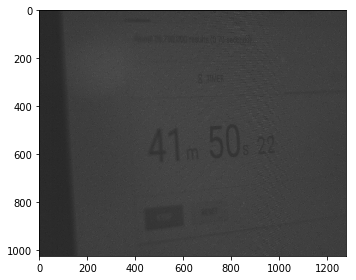

In [9]:
ret, frame = cap.read()
io.imshow(frame)
np.max(frame)
np.min(frame)

In [ ]:
cv2.imwrite("hi.png", frame)

In [ ]:
print("last update: "  +  str(datetime.datetime.now()))

In [ ]:
# capture image with point grey camera
bus = fc2.BusManager()
numCams = bus.getNumOfCameras()
print("Number of cameras detected: ", numCams)
if not numCams:
    print("Insufficient number of cameras. Exiting...")
    exit()

In [ ]:
def enableEmbeddedTimeStamp(cam, enableTimeStamp):
    embeddedInfo = cam.getEmbeddedImageInfo()
    if embeddedInfo.available.timestamp:
        cam.setEmbeddedImageInfo(timestamp = enableTimeStamp)
        if(enableTimeStamp):
            print("\nTimeStamp is enabled.\n")
        else:
            print("\nTimeStamp is disabled.\n")

In [ ]:
# open qtconsole if it's not already running
try:
    console_is_running
except NameError:
    console_is_running = True
    %qtconsole

In [ ]:
def printCameraInfo(cam):
    camInfo = cam.getCameraInfo()
    print("\n*** CAMERA INFORMATION ***\n")
    print("Serial number - ", camInfo.serialNumber)
    print("Camera model - ", camInfo.modelName)
    print("Camera vendor - ", camInfo.vendorName)
    print("Sensor - ", camInfo.sensorInfo)
    print("Resolution - ", camInfo.sensorResolution)
    print("Firmware version - ", camInfo.firmwareVersion)
    print("Firmware build time - ", camInfo.firmwareBuildTime)
    fRateProp = cam.getProperty(fc2.PROPERTY_TYPE.FRAME_RATE)
    print("FrameRate - ", fRateProp.absValue)
    print()

In [ ]:
c = fc2.Camera()
c.connect(bus.getCameraFromIndex(0))
printCameraInfo(c)

d = fc2.Camera()
d.connect(bus.getCameraFromIndex(1))
printCameraInfo(d)

In [ ]:
def img2array(image):
    return(np.array(image.getData(), dtype="uint8").reshape( (image.getRows(), image.getCols()) ))

In [ ]:
def saveAviHelper(cam, fileFormat, fileName, frameRate):
    numImages = 100

    avi = fc2.AVIRecorder()

    for i in range(numImages):
        try:
            image = cam.retrieveBuffer()
        except fc2.Fc2error as fc2Err:
            print("Error retrieving buffer : ", fc2Err)
            continue

        print("Grabbed image {}".format(i))

        if (i == 0):
            if fileFormat == "AVI":
                avi.AVIOpen(fileName, frameRate)
            elif fileFormat == "MJPG":
                avi.MJPGOpen(fileName, frameRate, 75)
            elif fileFormat == "H264":
                avi.H264Open(fileName, frameRate, image.getCols(), image.getRows(), 1000000)
            else:
                print("Specified format is not available.")
                return

        avi.append(image)
        print("Appended image {}...".format(i))

    print("Appended {} images to {} file: {}...".format(numImages, fileFormat, fileName))
    avi.close()

In [ ]:
def saveAviHelper2(cam, cam2, fileFormat, fileName, fileName2, frameRate):
    numImages = 100

    avi = fc2.AVIRecorder()
    avi2 = fc2.AVIRecorder()

    for i in range(numImages):
        try:
            image = cam.retrieveBuffer()
            image2 = cam2.retrieveBuffer()
        except fc2.Fc2error as fc2Err:
            print("Error retrieving buffer : ", fc2Err)
            continue

        print("Grabbed image {}".format(i))

        if (i == 0):
            if fileFormat == "AVI":
                avi.AVIOpen(fileName, frameRate)
                avi2.AVIOpen(fileName2, frameRate)
#             elif fileFormat == "MJPG":
#                 avi.MJPGOpen(fileName, frameRate, 75)
#             elif fileFormat == "H264":
#                 avi.H264Open(fileName, frameRate, image.getCols(), image.getRows(), 1000000)
            else:
                print("Specified format is not available.")
                return

        avi.append(image)
        avi2.append(image2)
        print("Appended image {}...".format(i))

    print("Appended {} images to {} file: {}...".format(numImages, fileFormat, fileName))
    avi.close()
    avi2.close()

In [ ]:
c = fc2.Camera()
c.connect(bus.getCameraFromIndex(0))
enableEmbeddedTimeStamp(c, True)
c.startCapture()


d = fc2.Camera()
d.connect(bus.getCameraFromIndex(1))
enableEmbeddedTimeStamp(c, True)
d.startCapture()


In [ ]:
directory = os.path.join("C:\\Users\\Combes4\Desktop\\twoCamSave")
fileName = os.path.join(directory, "SaveImageToAviEx.avi")
fileName2 = os.path.join(directory, "SaveImageToAviEx2.avi")
frameRate = (c.getProperty(fc2.PROPERTY_TYPE.FRAME_RATE)).absValue
saveAviHelper2(c,d, "AVI", fileName.encode("utf-8"), fileName2.encode("utf-8"), 10)

In [ ]:
# When everything done, release the capture
c.stopCapture()
c.disconnect()

d.stopCapture()
d.disconnect()
cv2.destroyAllWindows()

In [ ]:
os.getcwd()

In [ ]:
fileName

In [ ]:
# combine videos to see if they're both the same

vidPath = 'C:\\Users\\Combes4\\Desktop\\twoCamSave\\SaveImageToAviEx-0000.avi'
vidPath2 = 'C:\\Users\\Combes4\\Desktop\\twoCamSave\\SaveImageToAviEx2-0000.avi'

cap = cv2.VideoCapture(vidPath)
cap2 = cv2.VideoCapture(vidPath2)

length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

print( length, width, height, fps)

In [ ]:

ctr = 0
photoDir = os.path.join("C:\\Users\\Combes4\Desktop\\twoCamSave\\images\\")

# make directory, if it doesn't exist
if not os.path.exists(photoDir):
    os.makedirs(photoDir)

for ff in range(length):
    ret, frame = cap.read()
    ret2, frame2 = cap2.read()
    im2 = np.concatenate((frame, frame2), axis = 1)
    io.imsave(photoDir + str(ctr).zfill(4) + '.png', im2)
    print(ff)
    ctr += 1

In [ ]:
io.imsave(photoDir + str(ctr).zfill(4) + '.png', im2)

In [ ]:
c1 = [os.path.join(directory, jj) for jj in os.listdir(directory) if jj.startswith("c1")]
c2 = [os.path.join(directory, jj) for jj in os.listdir(directory) if jj.startswith("c2")]

In [ ]:
for ii in range(10):
    imgg = np.concatenate((io.imread(c1[ii]), io.imread(c2[ii])), axis = 1)
    plt.figure(figsize=(20,10))
    io.imshow(imgg)